## Пример плохо обусловленной матрицы

In [1]:
# Матрица Вандермонда для равномерной сетки
import numpy as np
from scipy import linalg as scpla
N = 20
x = np.linspace(0, 1, N, dtype = np.float64)
V = np.vander(x)
print('cond_2(V) = {0:5.2e}'.format(np.linalg.cond(V)))

c = np.ones(N, dtype = np.float64)
b = np.dot(V, c)

c_ = np.linalg.solve(V, b)

print('||c - c_||_max = {0:5.2e}'.format(np.linalg.norm(c - c_, ord = np.Inf)))

cond_2(V) = 1.14e+16
||c - c_||_max = 1.53e-01


## Круги Гершгорина

[ 5.59691603 -0.12874337  2.15499524]


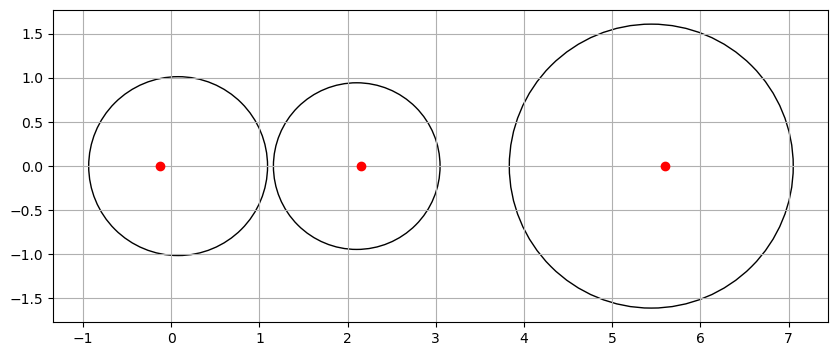

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

n = 3
A = np.zeros((n,n))
A = np.random.rand(n,n) - \
    2*np.triu(np.random.rand(n,n)) + \
    np.diag(np.arange(n)**2 + 1)
l = np.linalg.eigvals(A)
print(l)

circles = []
fig, ax = plt.subplots(figsize = (10,7))
for i in range(n):
    c = (np.real(A[i,i]), np.imag(A[i,i]))
    r = np.sum(np.abs(A[i,:])) - A[i,i]
    ax.add_patch(matplotlib.patches.Circle(c, r , fill = False))
ax.plot(np.real(l), np.imag(l),'ro')
ax.set_aspect('equal')
ax.grid(True)

### Улучшение обусловленности

In [3]:
n = 10
np.random.seed(10)
A = np.random.rand(n, n)

Q, R = np.linalg.qr(A)

big = (2/3) * 1e+4

d = np.ones(n)
d[-1] = big

A = Q @ np.diag(d) @ Q.T

d[0] = 1 + 1e-3
P = Q @ np.diag(d**-1) @ Q.T

b = np.random.rand(n)

A_prec = P @ A
b_prec = P @ b

x_dp = np.linalg.solve(A, b)

# Добавим конечное (достаточное большое) возмущение.

db = 1e-2 * np.random.rand(n)

b_ = b + db

b_prec_ = P @ (b + db)

x_ = np.linalg.solve(A, b_)
x_prec_ = np.linalg.solve(A_prec, b_prec_)

print('Results for large db')
print('||x_dp - x_|| = {0:5.2e}'.
      format(np.linalg.norm(x_dp - x_)))
print('||x_dp - x_prec_|| = {0:5.2e}'.
      format(np.linalg.norm(x_dp - x_prec_)))
print('||x_dp|| = {0:5.2e} \n'.
      format(np.linalg.norm(x_dp)))


Results for large db
||x_dp - x_|| = 1.34e-02
||x_dp - x_prec_|| = 1.34e-02
||x_dp|| = 1.79e+00 



In [4]:
# Теперь округлим всё до одинарной точности
# Это моделирует ситуацию, когда мы делаем предобуславливание
# до начала вычислений (сразу вычисляем матрицу и правую часть предобусловленной системы)

A_sp = A.astype(np.float32)
b_sp = b.astype(np.float32)
A_prec_sp = A_prec.astype(np.float32)
b_prec_sp = b_prec.astype(np.float32)

x_sp = np.linalg.solve(A_sp, b_sp)
x_prec_sp = np.linalg.solve(A_prec_sp, b_prec_sp)

print('Results for round-off')
print('||x_dp - x_sp|| = {0:5.2e}'.
      format(np.linalg.norm(x_dp - x_sp)))
print('||x_dp - x_prec_sp|| = {0:5.2e}'.
      format(np.linalg.norm(x_dp - x_prec_sp)))
print('||x_dp|| = {0:5.2e}'.
      format(np.linalg.norm(x_dp)))

Results for round-off
||x_dp - x_sp|| = 6.44e-05
||x_dp - x_prec_sp|| = 6.31e-08
||x_dp|| = 1.79e+00
